In [36]:
import pandas
pandas.set_option('display.max_columns', None)  # or 1000
pandas.set_option('display.max_rows', None)  # or 1000
pandas.set_option('display.max_colwidth', None)  # or 199
import pickle
import os

%reload_ext autoreload
%autoreload 2

from pyBenchmark import loadPickle, data_to_df, eliminate_blkSize_by_max, plot_data

In [33]:
# okay now load data
data = loadPickle(filepath='benchdata/stencil_blas.pickle')
df = data_to_df({'stencil_blas': data})
# df.index.name = "Output"
# df.columns.name = "Bench params"
display(df)

target        stencil_blas                                                \
T                    realF                                                 
N                      32                                                  
numRHS                  1                                                  
blkSize                128                                                 
grid          (4, 4, 4, 4)  (4, 4, 8, 8)  (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                     
task          stencil_blas  stencil_blas  stencil_blas      stencil_blas   
mu                       0             0             0                 0   
isForward             true          true          true              true   
T                    realF         realF         realF             realF   
sizeof_T                 4             4             4                 4   
N                       32            32            32                32   
numRHS                   1             1             1                 1   
grid          (4, 4, 4, 4)  (4, 4, 8, 8)  (8, 8, 8, 8)  (16, 16, 16, 16)   
numSites               256          1024          4096             65536   
blkSize                128           128           128               128   
time(us)             90.16        107.57        234.88           1771.08   
srhs_bw(GBs)       12.3571       41.4284       75.8932           161.039   
mrhs_bw(GBs)       12.3571       41.4284       75.8932           161.039   
copy_bw(GBs)      0.726886       2.43696       4.46431           9.47287   

target                                                                    \
T                                                                          
N                                                                          
numRHS                                                                     
blkSize                256                                                 
grid          (4, 4, 4, 4)  (4, 4, 8, 8)  (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                     
task          stencil_blas  stencil_blas  stencil_blas      stencil_blas   
mu                       0             0             0                 0   
isForward             true          true          true              true   
T                    realF         realF         realF             realF   
sizeof_T                 4             4             4                 4   
N                       32            32            32                32   
numRHS                   1             1             1                 1   
grid          (4, 4, 4, 4)  (4, 4, 8, 8)  (8, 8, 8, 8)  (16, 16, 16, 16)   
numSites               256          1024          4096             65536   
blkSize                256           256           256               256   
time(us)             92.26         89.07        238.19           1721.57   
srhs_bw(GBs)       12.0758       50.0331       74.8385            165.67   
mrhs_bw(GBs)       12.0758       50.0331       74.8385            165.67   
copy_bw(GBs)       0.71034       2.94312       4.40227            9.7453   

target                                                                    \
T                                                                          
N                                                                          
numRHS                  12                                                 
blkSize                128                                                 
grid          (4, 4, 4, 4)  (4, 4, 8, 8)  (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                     
task          stencil_blas  stencil_blas  stencil_blas      stencil_blas   
mu                       0             0             0                 0   
isForward             true          true          true              true   
T                    realF         realF      

<AxesSubplot: xlabel='T'>

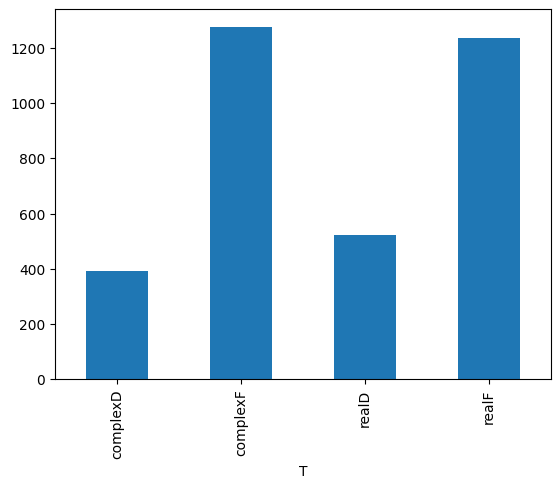

In [34]:
# use .loc to access the desired value of axis 0 e.g. srhs_bw or mrhs_bw
# use .xs function to access data by level name (very nice :) )
srhs_series = df.loc['srhs_bw(GBs)', ].xs('stencil_blas', level='target').xs('(16, 16, 16, 16)', level='grid').xs(64, level='N').xs(60, level='numRHS')

dataset = eliminate_blkSize_by_max(srhs_series)
dataset.plot(kind='bar')

In [43]:
selectors = {'grid': '(8, 8, 8, 8)', 'T': 'realF', 'target': 'stencil_blas', 'numRHS': 60}
plot_data(df=df, ax=None, xlabel='N', valuelabel='srhs_bw(GBs)', selectors=selectors)

TypeError: plot_data() got an unexpected keyword argument 'xlabel'